<a href="https://colab.research.google.com/github/PatrycjaSiczek/lung_cancer_dataset/blob/main/RakP%C5%82uc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***RAK PŁUC***

---

Zbiór danych przedstawia informacje o pacjentach z rakiem płuc, pokazuję stopień narażenia, objawów w zależnosci od różnych czynników

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

#Czyszcznie danych



---


Mozemy usunąć index oraz patient id - te zmienne nic nam nie zmieniają, nie potrzebujemy znać dokladnie jaki pacjent co zrobił, tylko ogólny ogląd na dane, reszta kolumn w mniejszym bądz większym stopniu jest powiązana z tematem raka płuc



In [ ]:
df.drop(columns = ['index'], inplace=True)
df.drop(columns = ['Patient Id'], inplace=True)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High




---


Musimy również zmienic typy zmiennych, tak aby każda kolumna była rozpoznawalna jako kategoria/wartośc a nie zwykly napis - w tym przypadku mowa o kolumnie "Level", zamieniamy więc typ "object" na typ "category", również kolumna Gender która posiada teraz wartosci 1 i 0, zamieńmy je na lepiej rozumiałe kobieta i mężczyzna


In [ ]:
df['Level'] = df['Level'].astype('category')
df["Gender"] = df["Gender"].replace({1: "Male", 2: "Female"})
df['Gender'] = df['Gender'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1000 non-null   int64   
 1   Gender                    1000 non-null   category
 2   Air Pollution             1000 non-null   int64   
 3   Alcohol use               1000 non-null   int64   
 4   Dust Allergy              1000 non-null   int64   
 5   OccuPational Hazards      1000 non-null   int64   
 6   Genetic Risk              1000 non-null   int64   
 7   chronic Lung Disease      1000 non-null   int64   
 8   Balanced Diet             1000 non-null   int64   
 9   Obesity                   1000 non-null   int64   
 10  Smoking                   1000 non-null   int64   
 11  Passive Smoker            1000 non-null   int64   
 12  Chest Pain                1000 non-null   int64   
 13  Coughing of Blood         1000 non-null   int64  



---


Sprawdzamy czy mamy jakies braki w danych - nie mamy

In [ ]:
df.isna().sum() / len(df) * 100

,0
Age,0.0
Gender,0.0
Air Pollution,0.0
Alcohol use,0.0
Dust Allergy,0.0
OccuPational Hazards,0.0
Genetic Risk,0.0
chronic Lung Disease,0.0
Balanced Diet,0.0
Obesity,0.0


i na tym skonczyliśmy czyścic dane


---



Text(0, 0.5, 'Liczba pacjentów')

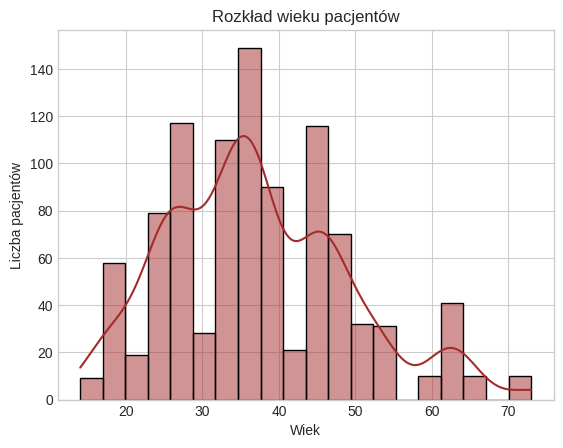

In [ ]:
sns.histplot(df['Age'], kde=True, bins=20, color='brown')
plt.title("Rozkład wieku pacjentów")
plt.xlabel("Wiek")
plt.ylabel('Liczba pacjentów')


Najwięcej mamy osób w wieku 35lat, jest wiele młodych osób nawet ponizej 20 roku życia, które już są narażone na raka płuc

Text(0, 0.5, 'Liczba pacjentów')

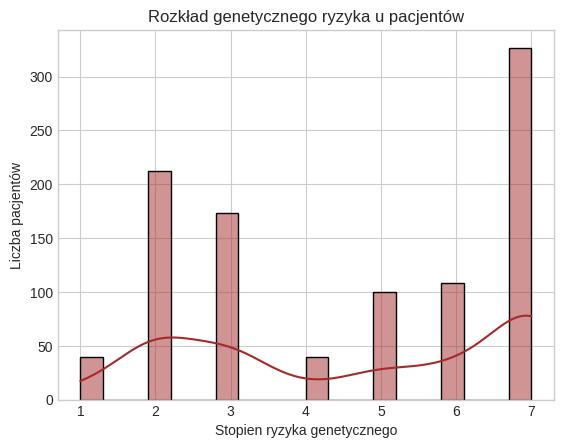

In [ ]:
sns.histplot(df['Genetic Risk'], kde=True, bins=20, color='brown')
plt.title("Rozkład genetycznego ryzyka u pacjentów")
plt.xlabel("Stopien ryzyka genetycznego")
plt.ylabel('Liczba pacjentów')

Text(0, 0.5, 'Liczba pacjentów')

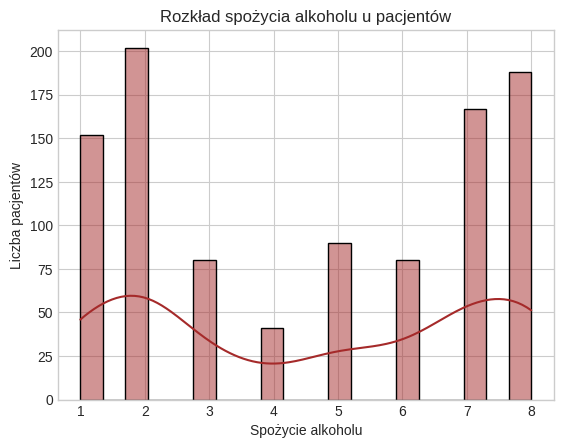

In [ ]:
sns.histplot(df['Alcohol use'], kde=True, bins=20, color='brown')
plt.title("Rozkład spożycia alkoholu u pacjentów")
plt.xlabel("Spożycie alkoholu")
plt.ylabel('Liczba pacjentów')

In [ ]:
pastel_brown_colors = ['brown', '#C2A68F',  '#F08080']
level = df['Level'].value_counts()* 100
level = level.reset_index()
level.columns = ['Level', 'Percentage']
px.pie(level, names='Level', values='Percentage', hole=0.3, color_discrete_sequence=pastel_brown_colors)


Najwięcej badanych ma wysoki poziom narażenia na raka płuc, natomiast wciąż jest to podobna liczba do pozostałych


---



Text(0, 0.5, 'Poziom')

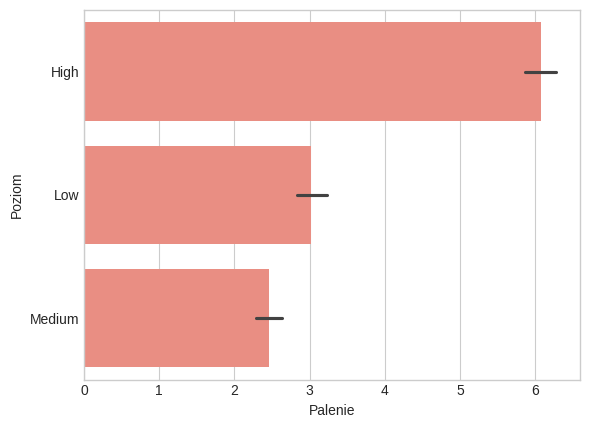

In [ ]:
sns.barplot(y='Level', x='Smoking', data =df, color='#FA8072')
plt.xlabel("Palenie")
plt.ylabel('Poziom')

Jak widać im większy poziom palenia, tym większe ryzyko zaawansowango stanu choroby. Ograniczając palenie, mamy mniejsze szanse na zachorowanie na tą przypadłość

<ipython-input-28-bfbdc2b267a6>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Text(0, 0.5, 'Poziom ryzyka')

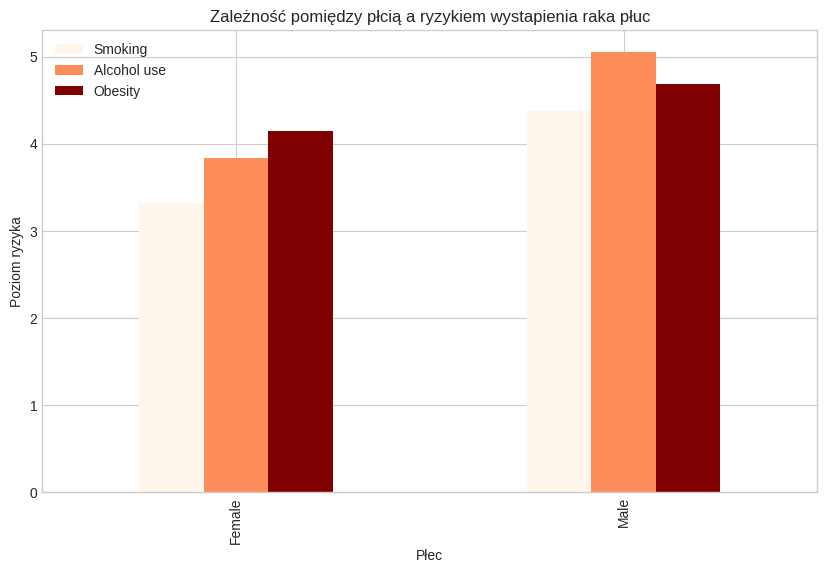

In [ ]:
risk = ['Smoking', 'Alcohol use', 'Obesity']
gender_risk = df.groupby('Gender')[risk].mean()
gender_risk.plot(kind='bar', figsize=(10,6), colormap='OrRd')
plt.title("Zależność pomiędzy płcią a ryzykiem wystapienia raka płuc")
plt.xlabel("Płec")
plt.ylabel('Poziom ryzyka')



---


U kobiet występuje mniejsza otyłosć, spożycie alkoholu, czy palenie, co w znaczym stpniu wpływa na obniżenie poziomu ryzyka zachorowania na raka płuc

In [ ]:
fig = px.scatter_3d(df,x='Age',y='Smoking',z='Genetic Risk',color='Level',title='Zależność miezy wiekiem, paleniem i ryzykien genetycznym', labels={'Age': 'Wiek', 'Smoking': 'Palenie', 'Genetic Risk': 'Ryzyko Genetyczne'}, color_discrete_sequence=['#FAD02E', '#F28D35', '#D83367'])
fig.show()

Palenie w każym wieku zwiększa ryzyko zachorowania, ryzyko genetyczne w dużym
stopniu odpowiada za zwiększony poziom zachorowania


Text(0, 0.5, 'Duszność')

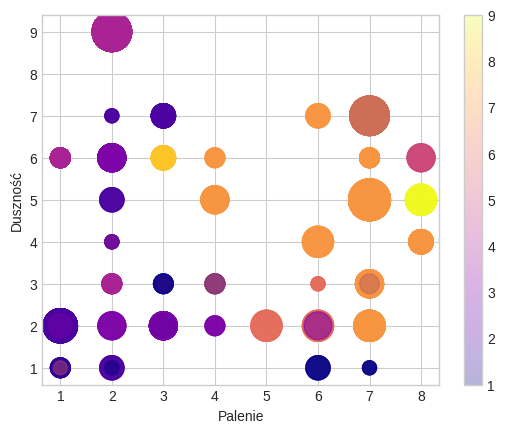

In [ ]:
x = df["Smoking"]
y = df['Shortness of Breath']
colors = df['Chest Pain']
sizes = 100 * df['Fatigue']

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='plasma')
plt.colorbar();
plt.xlabel('Palenie')
plt.ylabel('Duszność')

Punktowy wykres zaleznosci pomiedzy poziomem palenia a poziomem duszności, kolor oznacza poziom bólu klatki piersiowej -
im jaśnijszy tym ból jest większy,
a rozmiar tych kuleczek pokazuje poziom zmęczenia im większe tym większe zmęczenie


---



In [ ]:
import plotly.graph_objects as go
level_avg = df.groupby('Level')[['Swallowing Difficulty', 'Shortness of Breath', 'Fatigue']].mean()

fig = go.Figure()

fig.add_trace(go.Scatter(x=level_avg.index, y=level_avg['Swallowing Difficulty'], mode='lines+markers', name='Swallowing Difficulty',  line=dict(color='#FAD02E')))
fig.add_trace(go.Scatter(x=level_avg.index, y=level_avg['Shortness of Breath'], mode='lines+markers', name='Shortness of Breath'))
fig.add_trace(go.Scatter(x=level_avg.index, y=level_avg['Fatigue'], mode='lines+markers', name='Fatigue', line=dict(color='#D83367')))

fig.update_layout( title="Nasilenie objawów w podziale na Level", xaxis_title="Poziom", yaxis_title="Średnia intensywność objawów (1-7)", showlegend=True)
fig.show()

<ipython-input-40-eb24c7226a92>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Im większy stopień zaawansowania raka, tym tym większe nasilenie wszystkich objawów

In [ ]:
fig = px.scatter( df, x='Chest Pain', y='Fatigue', color='Level', symbol='Gender', size='Weight Loss', hover_data=['Coughing of Blood'], width=800, height=500, title="Ból w klatce a zmęczenie")
fig.show()

Największy ból odczuwają osoby z dużym stopniem zaawansowania raka, niezależn ie od płci

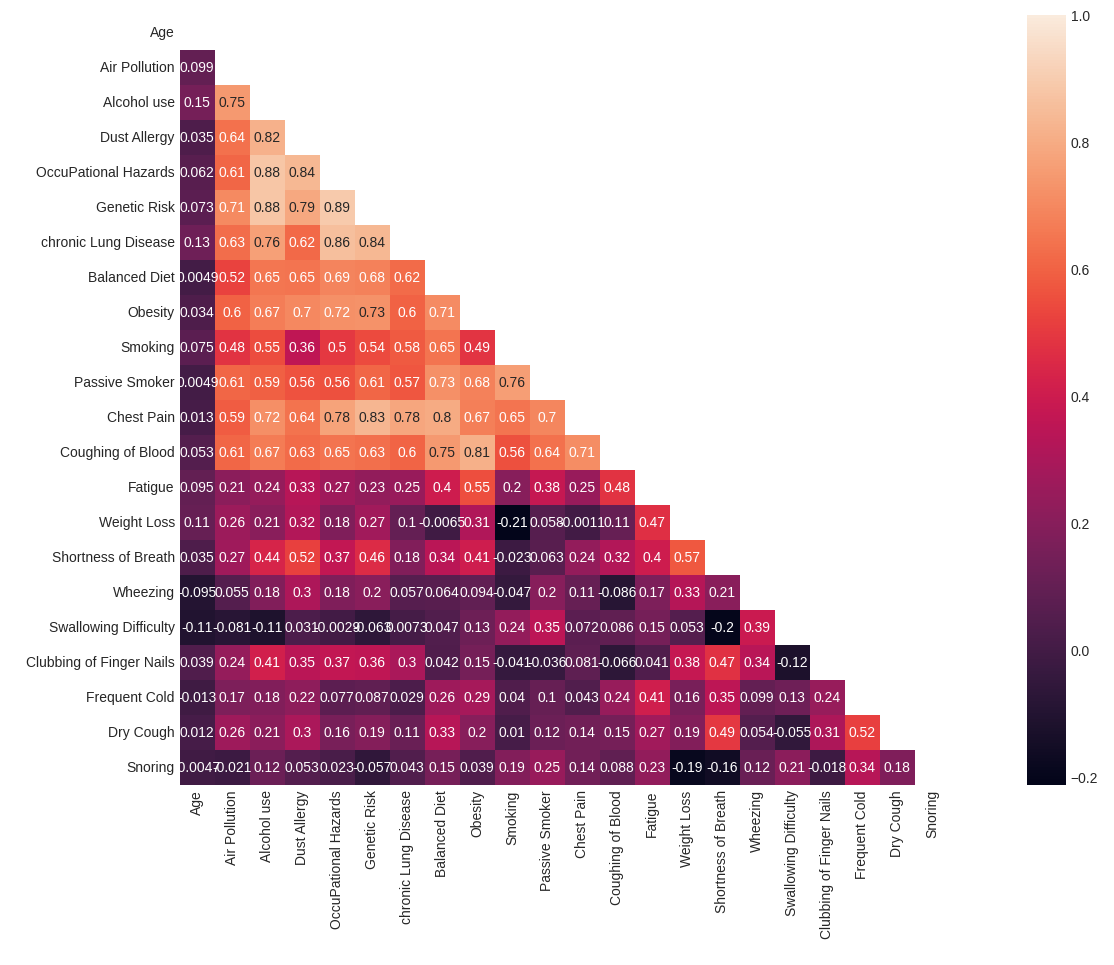

In [ ]:
mask = np.zeros_like(df.select_dtypes(include='number').corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 10))
    ax = sns.heatmap(df.select_dtypes(include='number').corr(), mask=mask, vmax=1, square=True, annot=True)

#Klasyfikacja

Stwórzmy klasyfikacje, która pozwoli nam przewidziec poziom zaawansowania raka płuc na podstawie danych które mamy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

level_column = df['Level']  # zapisujemy kolumnę 'Level'
df_encoded = pd.get_dummies(df.drop('Level', axis=1), drop_first=True)  # kodujemy wszystkie inne kolumny

# Teraz kolumna 'Level' jest oddzielna, więc możemy ją z powrotem przypisać
X = df_encoded  # X to teraz zakodowane dane
y = level_column

#dzielimy dane na treningowe i tekstowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Treningowy zestaw danych: {X_train.shape}")
print(f"Testowy zestaw danych: {X_test.shape}")

clf = DecisionTreeClassifier(random_state=42) # drzewo decyzyjne
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# F1- to dla klasyfikacji
f1 = f1_score(y_test, y_pred, average='weighted')  # F1-score dla wieloklasowej klasyfikacji
print(f"F1-score dla modelu drzewa decyzyjnego: {f1}")

# pokazuje co jak wyszlo w klasyfikacji
print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))


Treningowy zestaw danych: (800, 23)
Testowy zestaw danych: (200, 23)
F1-score dla modelu drzewa decyzyjnego: 1.0
Raport klasyfikacji:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



wartośc F1 = 1 to miara skutecznosci, więc nasze obliczenia wyszły dobrze, model klasyfikuje wszystkie przypadki poprawnie
recall = 1 rowniez pokazje ze w tym modelu nie powinno być nieporawnych danych
raport pokazuje, że wszystko poszło zgodnie z planem

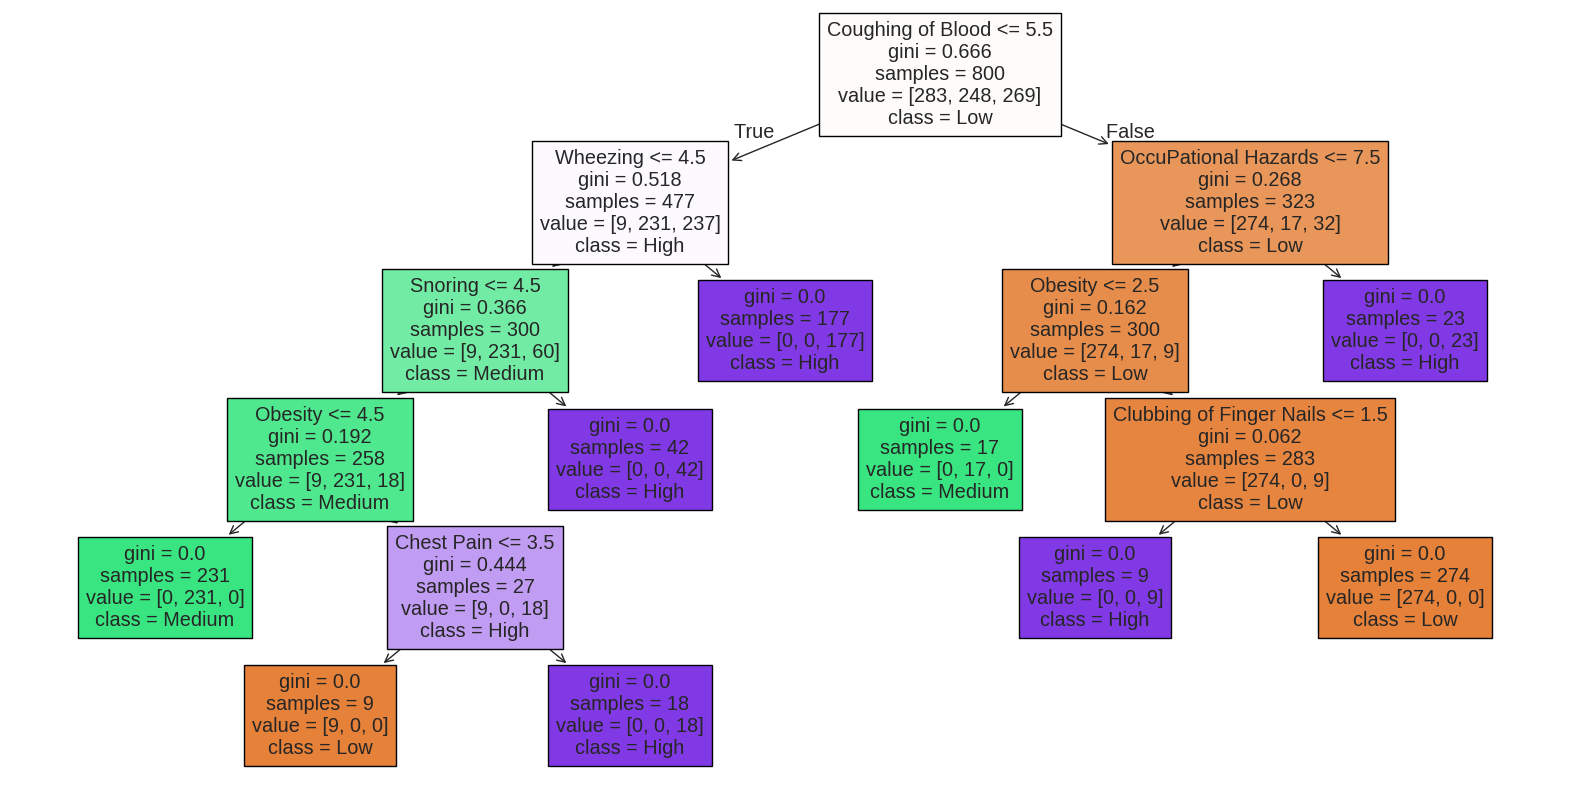

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Low', 'Medium', 'High'], filled=True)
plt.show()

Drzewo decyzyjne pomaga nam w przewidywaniu zaawansowania raka płuc - czy jest to niski, sredni czy wysoki stan choroby.
Dzięki drzewu mozna zauważyć, że głowną cechą jest kaszel z krwią, ponieważ znajduje sie przy korzeniu drzewa  
gini- pokazuje poziom 'czystosci' danych

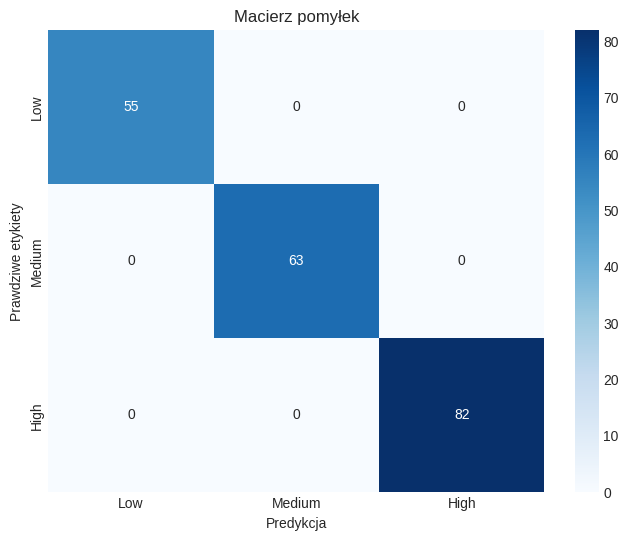

Raport klasyfikacji:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00        82
      Medium       1.00      1.00      1.00        55
        High       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Definiowanie nazw klas
class_names = ['Low', 'Medium', 'High']

# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred, labels = ['Low', 'Medium', 'High'])

# Wyświetlenie macierzy pomyłek
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predykcja')
plt.ylabel('Prawdziwe etykiety')
plt.title('Macierz pomyłek')
plt.show()

# Raport klasyfikacji
report = classification_report(y_test, y_pred, target_names=class_names)
print("Raport klasyfikacji:\n", report)